In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from transformers import Qwen2VLProcessor, Qwen2VLModel
from PIL import Image, ImageEnhance  
import requests
from io import BytesIO
import matplotlib.pyplot as plt

c:\Users\Kavindu Dushmantha\.conda\envs\ocr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_name="Qwen/Qwen2-VL-7B-Instruct"
model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto",
)

processor = AutoProcessor.from_pretrained( model_name)

c:\Users\Kavindu Dushmantha\.conda\envs\ocr\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kavindu Dushmantha\.cache\huggingface\hub\models--Qwen--Qwen2-VL-7B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ValueError: Using a `device_map`, `tp_plan`, `torch.device` context manager or setting `torch.set_default_device(device)` requires `accelerate`. You can install it with `pip install accelerate`

In [ ]:
image_path = "/kaggle/input/ocr-receipts-text-detection/boxes/1.png"
image = Image.open(image_path)
image = ImageEnhance.Contrast(image).enhance(2.0).convert("RGB")


messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Extract all the text in this image."}
        ]
    }
]

inputs = processor(
    text=processor.apply_chat_template(messages, add_generation_prompt=True),
    images=[image],
    padding=True,
    return_tensors="pt"
)
inputs = inputs.to("cuda")

output_ids = model.generate(**inputs, max_new_tokens=1024)


extracted_text = processor.batch_decode(
    output_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)[0]


plt.figure(figsize=(16, 16))
plt.imshow(image)
plt.axis("off")
plt.title("Extracted Text from Image")
plt.show()

print("Extracted Text:", extracted_text)

Text(0.5, 1.0, 'Unwarped Image')

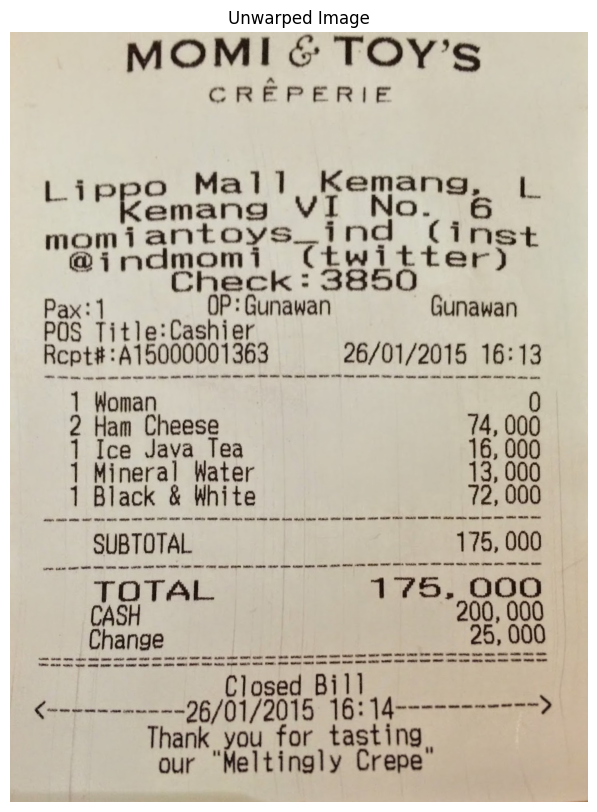

In [6]:
from PIL import Image
from docuwarp.unwarp import Unwarp
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Try forcing CPU execution
unwarp = Unwarp(providers=["CPUExecutionProvider"])

# Load the image
image = Image.open(r'D:\Projects\expense\data\images\4.jpg')

# Run unwarping
unwarped_image = unwarp.inference(image)

# Convert PIL to OpenCV
unwarped_cv = cv2.cvtColor(np.array(unwarped_image), cv2.COLOR_RGB2BGR)

# Display the unwarped image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(unwarped_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Unwarped Image")